# Project Foundations for Data Science: FoodHub Data Analysis



### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Understanding the structure of the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/A.T.I/MIT IDSS/Assessments/Project Assessment: Foundations of Data Science/foodhub_order.csv')
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [ ]:
df.shape # Return numbers of rows and columns

(1898, 9)



#### Observations: In the dataset are 1898 rows and 9 columns.

### **Question 2:** What are the datatypes of the different columns in the dataset? 

In [ ]:
df.info() # Return summary information of the dataset. Column names, null value counts and type of the variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
The data types consist in float64(1), int64(4), object(4).

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [ ]:
df.isnull().sum() # search null variables for each column and return the sum of each null value

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### **Observations:**
There is 0 null values in the data.





### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
df.describe() # Return summary statistical values of df

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time,total_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749,51.533720
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637,6.833603
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000,35.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000,47.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000,52.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000,56.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000,68.000000


In [ ]:
df['food_preparation_time'].describe() # Return summary statistical values of food preparation time

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

#### **Observations:**
The minimum an order can take to be prepared is 20 minutes, the mean is 27.37 and the maximum it can take to be prepared is 35 minutes. The standard deviation is 4.6 meaning the distribution of values separate between each other in 4.6 approximately.


### **Question 5:** How many orders are not rated?

In [ ]:
ratingCol = df['rating'] == 'Not given' # We use equality operator to search for not rated orderes inside 'rating' column and assign the values to a variable
ratingCol.sum() # Return all the not rated values inside the variable we just created

736

In [ ]:
df['rating'].value_counts() # Return all the unique values and return the top 5

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

<Axes: xlabel='rating', ylabel='count'>

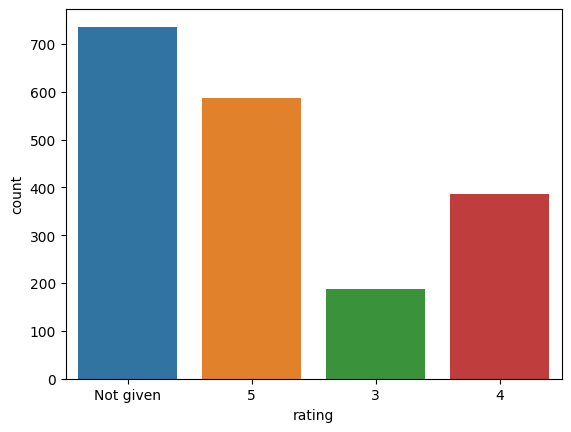

In [ ]:
sns.countplot(x = df['rating']) # Count plots are meant to be used with categorical variables and not numerical, as 'rating' is object dtype, this plot works in this case.

#### **Observations:**
The dataset has 736 orders that are not rated.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

array([[<Axes: title={'center': 'cost_of_the_order'}>,
        <Axes: title={'center': 'food_preparation_time'}>],
       [<Axes: title={'center': 'delivery_time'}>, <Axes: >]],
      dtype=object)

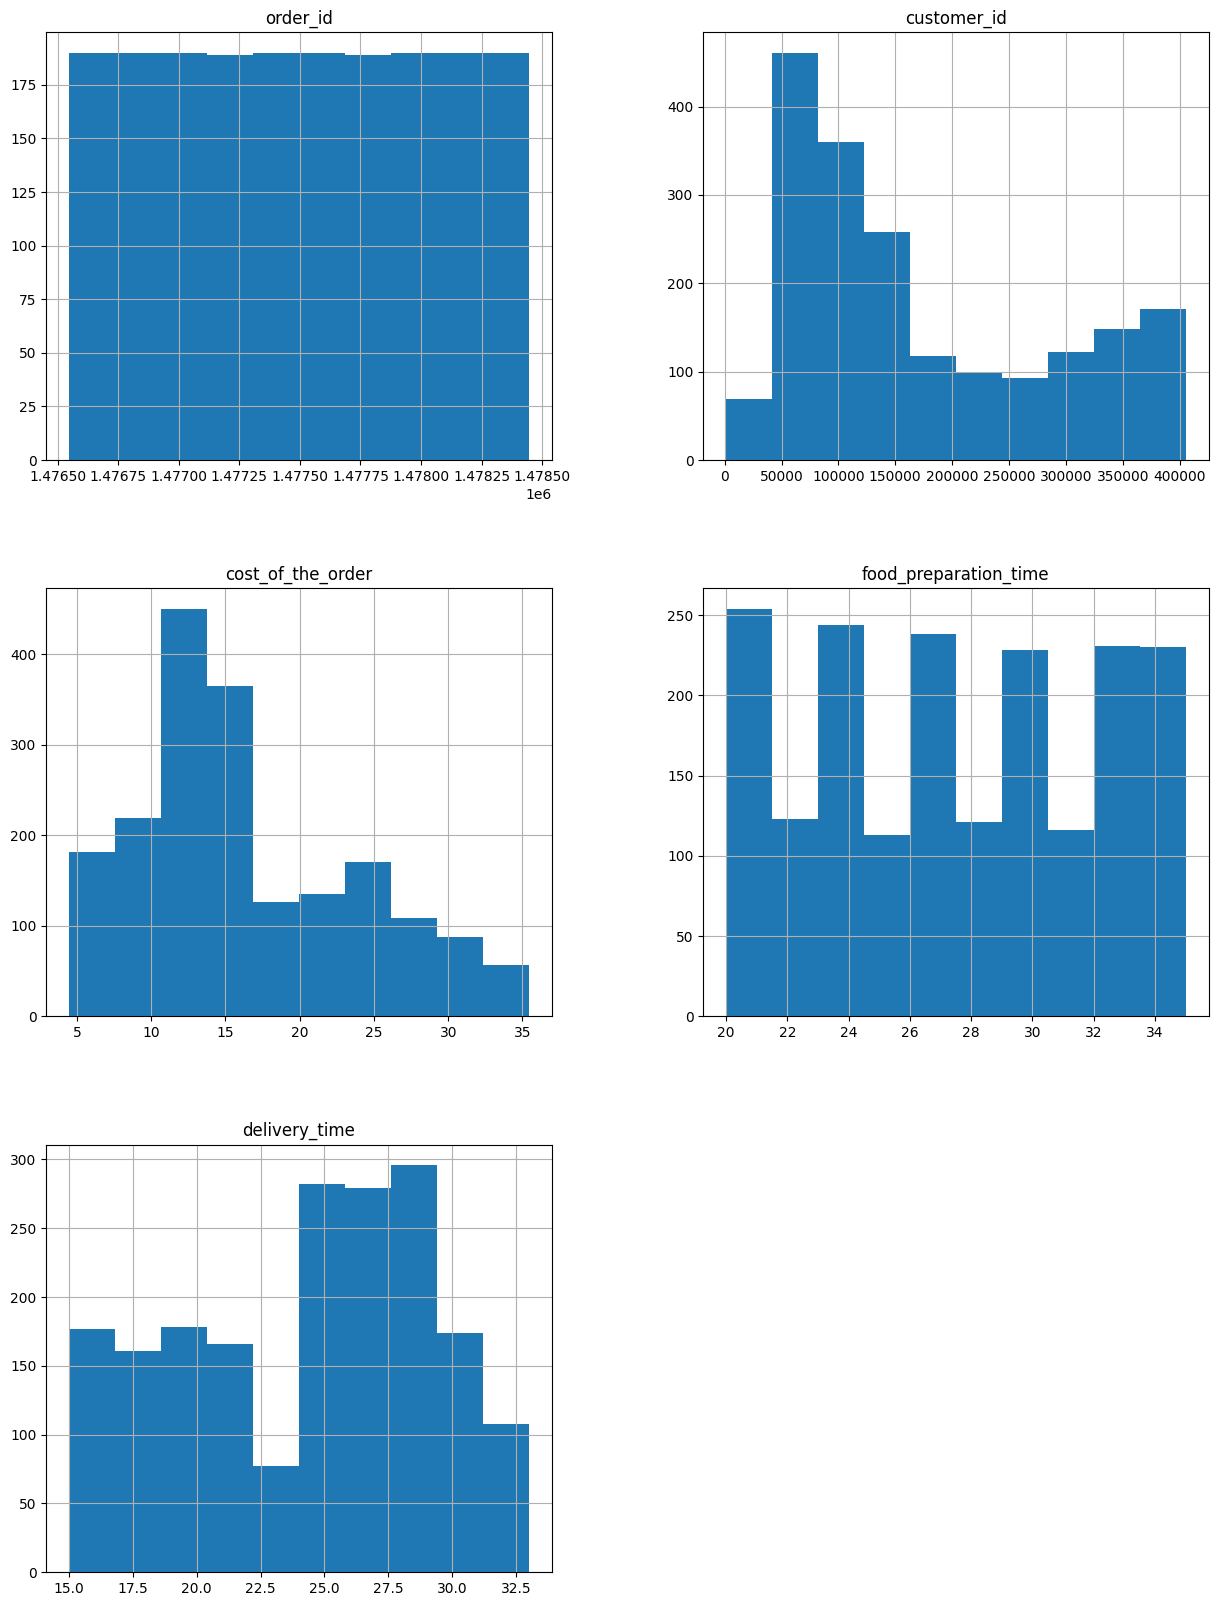

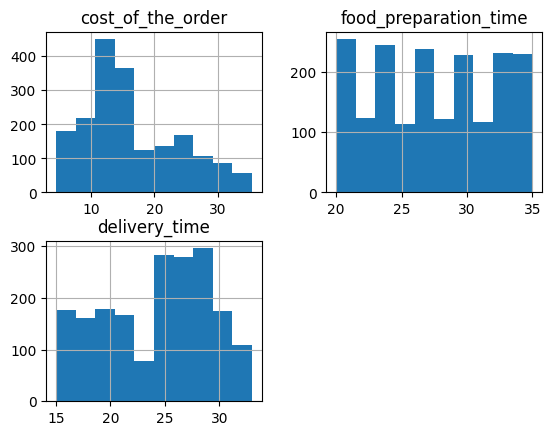

In [ ]:
df.hist(figsize=(15,20))
df.hist(column=['cost_of_the_order','food_preparation_time','delivery_time'])

#### Order ID

In [ ]:
df['order_id'].nunique() #get numbers of unique values on order id

1898

#### Customer ID

In [ ]:
df['customer_id'].nunique() #get numbers of unique values on customer id

1200

#### Restaurant name

In [ ]:
df['restaurant_name'].nunique() #Return total numbers of unique values

178

In [ ]:
df.value_counts(df['restaurant_name']).head(30) #Selecting restaurant names columns in dataframe as criteria, return top 30 more ordered restaurants

restaurant_name
Shake Shack                              219
The Meatball Shop                        132
Blue Ribbon Sushi                        119
Blue Ribbon Fried Chicken                 96
Parm                                      68
RedFarm Broadway                          59
RedFarm Hudson                            55
TAO                                       49
Han Dynasty                               46
Blue Ribbon Sushi Bar & Grill             44
Nobu Next Door                            42
Rubirosa                                  37
Sushi of Gari 46                          37
Momoya                                    30
Blue Ribbon Sushi Izakaya                 29
Five Guys Burgers and Fries               29
Bareburger                                27
Tamarind TriBeCa                          27
Jack's Wife Freda                         25
Sushi of Gari Tribeca                     24
Chipotle Mexican Grill $1.99 Delivery     23
Cafe Mogador                           

 **Observations:**

In the dataset exist 178 restaurants with different cuisine types.

#### Cusine type

<Axes: xlabel='cuisine_type', ylabel='count'>

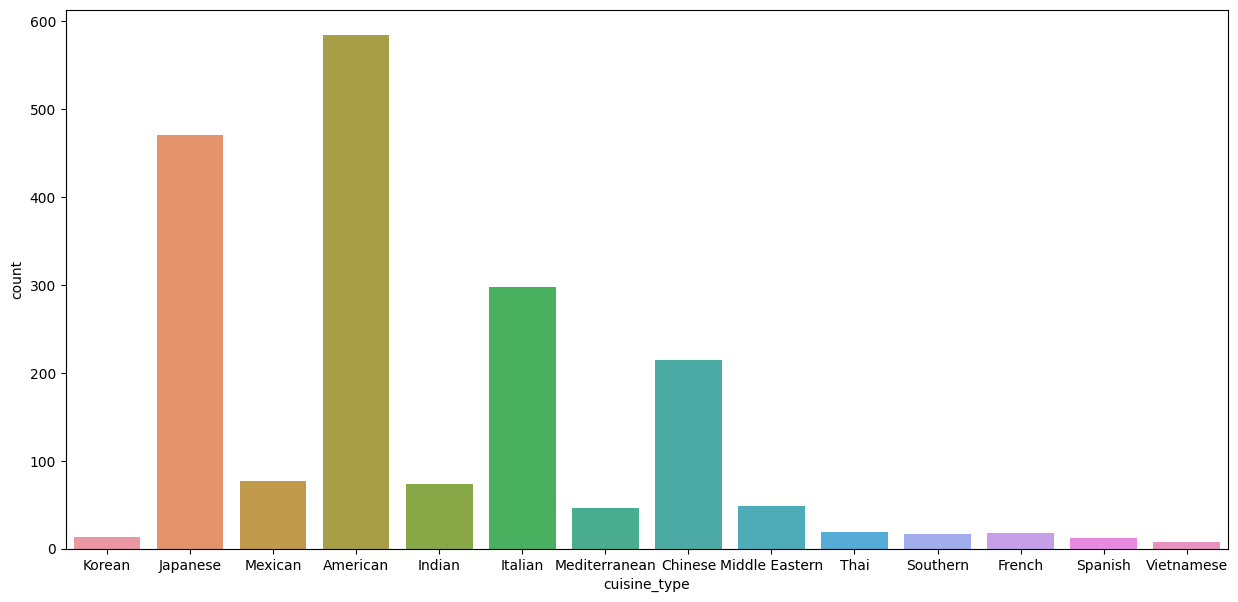

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(data=df,x='cuisine_type')

In [ ]:
cuisinetypes = df.value_counts(df['cuisine_type']) #Return of all orders how many are for each cusine type
cuisinetypes # call variable and run function

cuisine_type
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
dtype: int64

In [ ]:
df['cuisine_type'].nunique() #Search unique values as number

14

 **Observations:**
 <br>
14 cuisine types

The top cuisine types are:


1.   American - 584 orders
2.   Japanese - 470 orders
3.   Italian - 298 orders
4.   Chinese - 215 orders
5.   Mexican - 77 orders



#### Cost of the order

<Axes: xlabel='cost_of_the_order', ylabel='Count'>

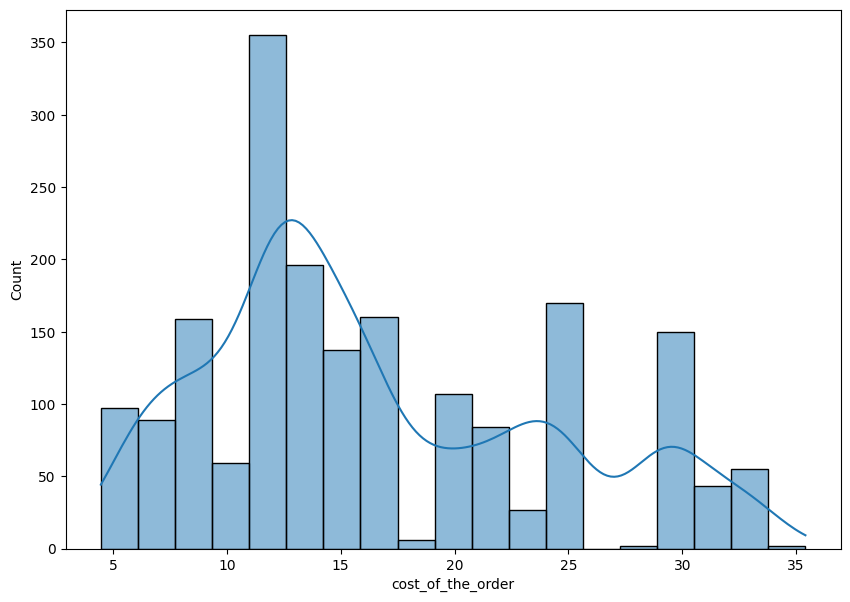

In [ ]:
plt.figure(figsize=(10,7))
sns.histplot(data=df,x='cost_of_the_order',kde=True)

<Axes: xlabel='cost_of_the_order'>

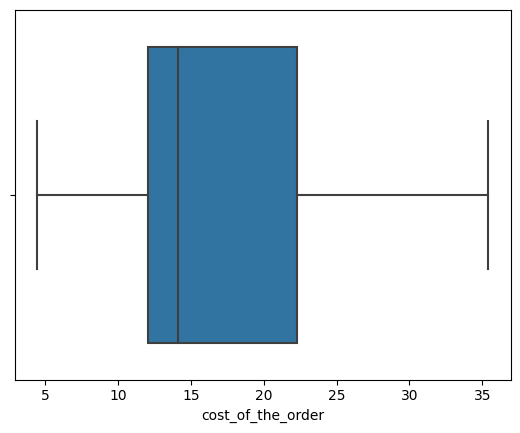

In [ ]:
sns.boxplot(data=df,x='cost_of_the_order')

**Observations:**
<br>
For the variable, cost of the order, we can see the distribution is right-skewed and has non outliers.

####Day of the week

<Axes: xlabel='day_of_the_week', ylabel='count'>

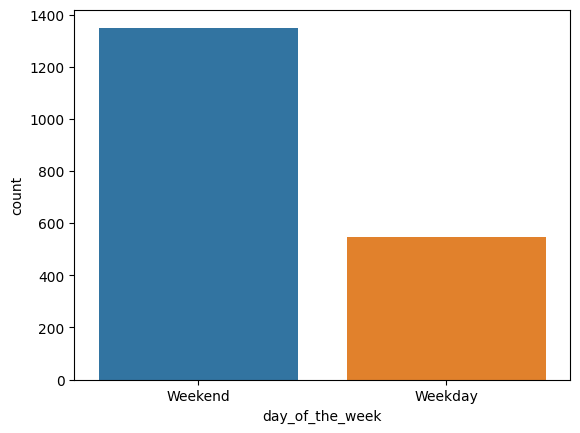

In [ ]:
sns.countplot(data=df,x='day_of_the_week')

In [ ]:
df.value_counts(df['day_of_the_week'])

day_of_the_week
Weekend    1351
Weekday     547
dtype: int64

**Observations**:
<br>
The weekends have almost x2.5 more orders than in the week days.

####Rating

<Axes: xlabel='rating', ylabel='count'>

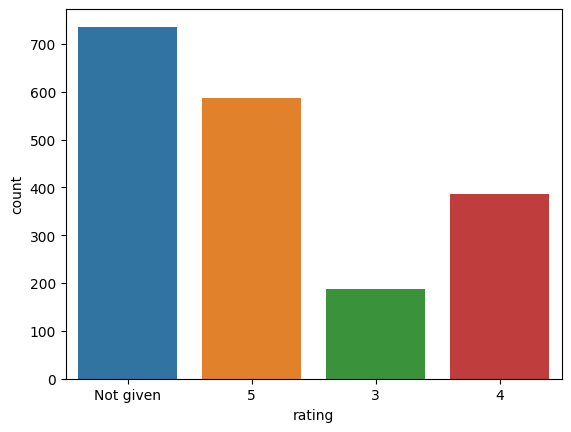

In [ ]:
sns.countplot(data=df,x='rating')

In [ ]:
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

**Observations:**
<br>
Customers may not give a rating if they decide or rate from 1 to 5. For this dataset the rating variable is distributed as the next:

*   39% not have rating
*   31% rated 5
*   20% rated 4
*   10% rated 3



#### Food preparation

<Axes: xlabel='food_preparation_time', ylabel='count'>

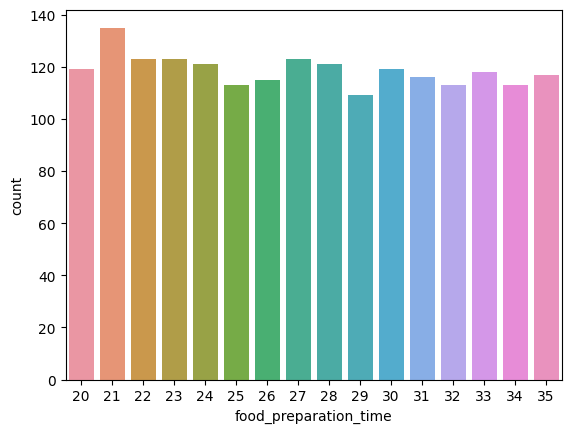

In [ ]:
sns.countplot(data=df,x='food_preparation_time')

<Axes: xlabel='food_preparation_time', ylabel='Count'>

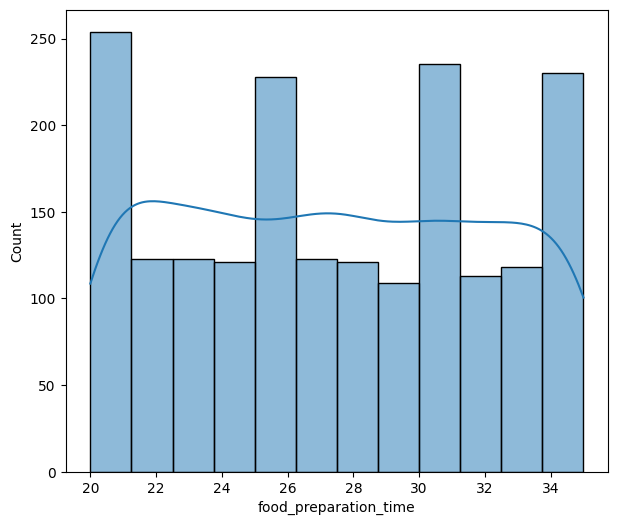

In [ ]:
plt.figure(figsize=(7,6))
sns.histplot(data=df,x='food_preparation_time',kde=True)

<Axes: xlabel='food_preparation_time'>

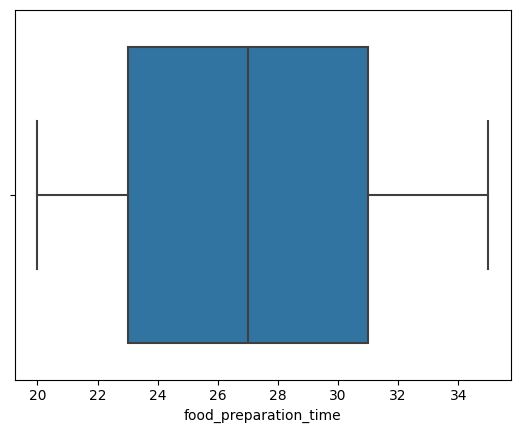

In [ ]:
sns.boxplot(data=df,x='food_preparation_time')

**Observations:**
<br>
Food preparation time variable has a uniform/flat distribution.

####Delivery time

<Axes: xlabel='delivery_time', ylabel='Count'>

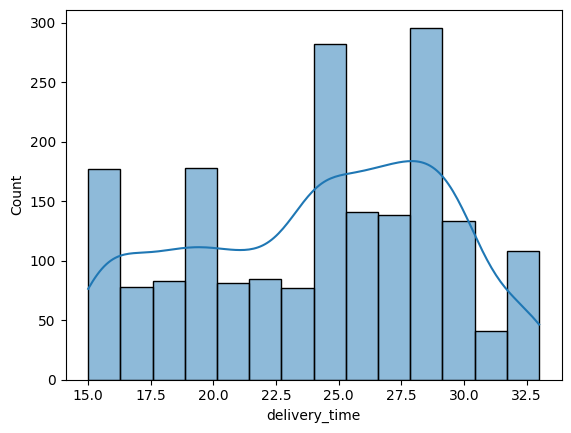

In [ ]:
sns.histplot(df['delivery_time'],kde=True)

<Axes: xlabel='delivery_time'>

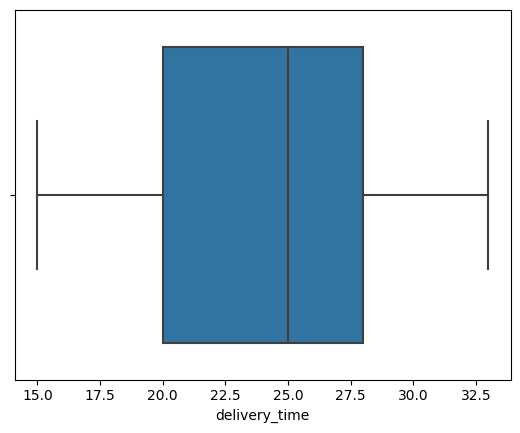

In [ ]:
sns.boxplot(data= df,x='delivery_time')

**Observations:**
<br>
The distribution of the data is charged to right, showing that the more amount of data is on values are between 25 and 29.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [ ]:
df['restaurant_name'].value_counts().head() #Return most ordered restaurants

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

In [ ]:
df['restaurant_name'].unique().size # Return total of unique restaurants

178

#### **Observations:**

The top restaurants are:



1.   Shake Shack - 11.5% of the orders
2.   The meatball Shop - 7% of the orders
3.   Blue Ribbon Sushi - 6.2% of the orders
4.   Blue Ribbon Fried Chicken - 5.05% of the orders
5.   Parm - 3.5% of the orders



### **Question 8**: Which is the most popular cuisine on weekends?

In [ ]:
cuisineWknd = df[df['day_of_the_week'] =='Weekend'] #Apply 'Weekend' condition on column day of the week and assign value to variable
cuisineWknd['cuisine_type'].value_counts().head(1) # Apply condition to set a parameter to search where values match the condition

American    415
Name: cuisine_type, dtype: int64

#### **Observations:**

The american Cuisine is the most popular cuisine on the weekends.

### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [ ]:
cost20 = df['cost_of_the_order'] > 20.0 #Assign all the orders greater than 20 dollas to a variable
q9 = cost20.value_counts() # apply function to observe the values that are greater than 20 as True and the rest of the values less than 20 as false
(q9/1898)*100 # divide values by the total of orders and multiple by 100 to transform it directly to percentage

False    70.758693
True     29.241307
Name: cost_of_the_order, dtype: float64

#### **Observations:**

29.24% of the orders cost more than 20 dollars.

### **Question 10**: What is the mean order delivery time?

In [ ]:
meanDelivery = df['delivery_time'] #select the column of delivery time and assign it to a variable
meanDelivery.mean() #use numpy function to calculate mean

24.161749209694417

#### **Observations:**

The average time that an order can be is 24 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [ ]:
topCustomers = df['customer_id'].value_counts().head(3) #It search on customer id column the number of times each customer appears meaning the numbers of orders too
topCustomers

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### **Observations:**

#### **Top Customers**

*  #1 ID: 52832 | N° of orders: 13
*  #2 ID: 47440 | N° of orders: 10
*  #3 ID: 83287 | N° of orders: 9

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

###Rating and Delivery time

<Axes: xlabel='rating', ylabel='delivery_time'>

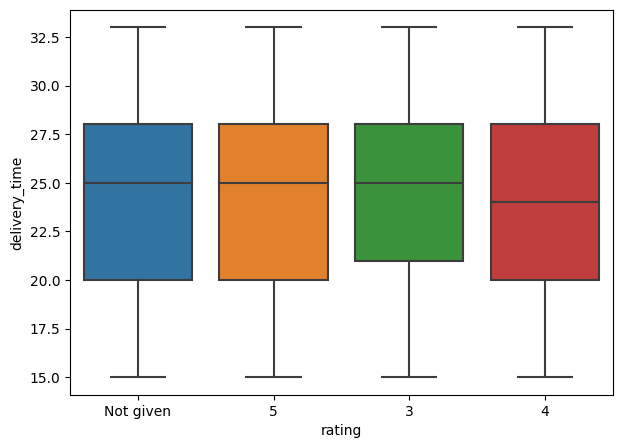

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df,x='rating',y='delivery_time')

<Axes: xlabel='rating', ylabel='delivery_time'>

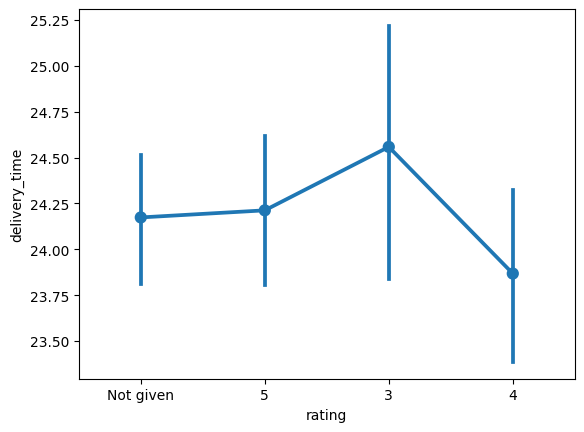

In [ ]:
sns.pointplot(data=df,x= 'rating',y='delivery_time')

**Observations:**
<br>
We can observe that for orders where the delivery time is greater than 24.25 the rating will be affected considerably.

###Rating and cost of the order

<Axes: xlabel='rating', ylabel='cost_of_the_order'>

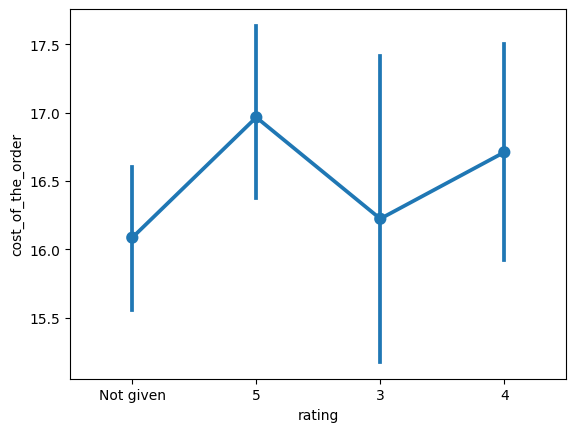

In [ ]:
sns.pointplot(data=df,x='rating',y='cost_of_the_order')

**Observations:**
<br>
Within the plot, we can observe that, greater the cost of the order, greater the rating (4 and 5) and lower the cost, lower the rating.

###Cuisine type and Food preparation time

<Axes: xlabel='cuisine_type', ylabel='food_preparation_time'>

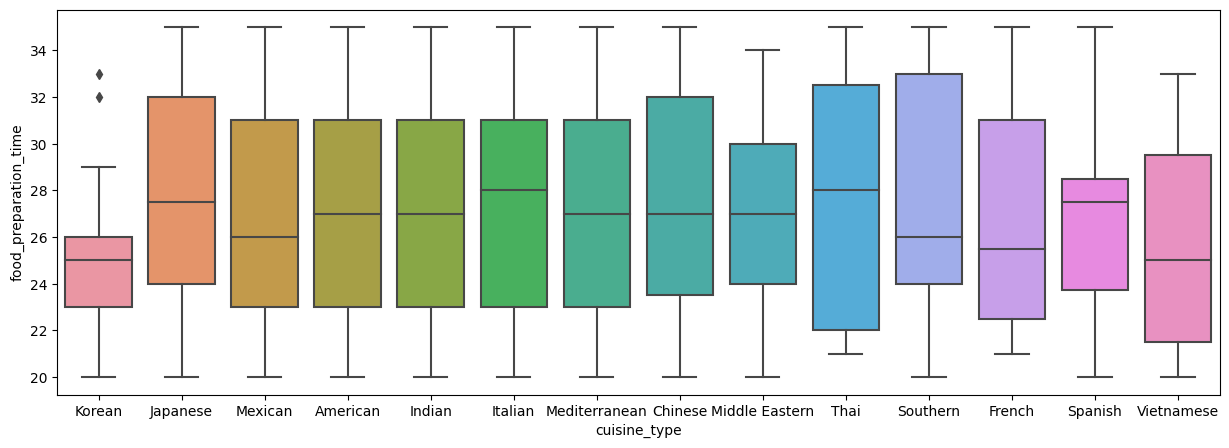

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df,x='cuisine_type',y='food_preparation_time')

**Observations:**
<br>
The min preparation time for almost the whole dataset is 20 minutes and for maximum time is over 35 min for almost every cuisine type. The korean cuisine is the only cuisine type with outliers in their data. The median food preparation time is aroud 25 to 28 for all the cuisine types.

###Cuisine type and cost of the order

<Axes: xlabel='cuisine_type', ylabel='cost_of_the_order'>

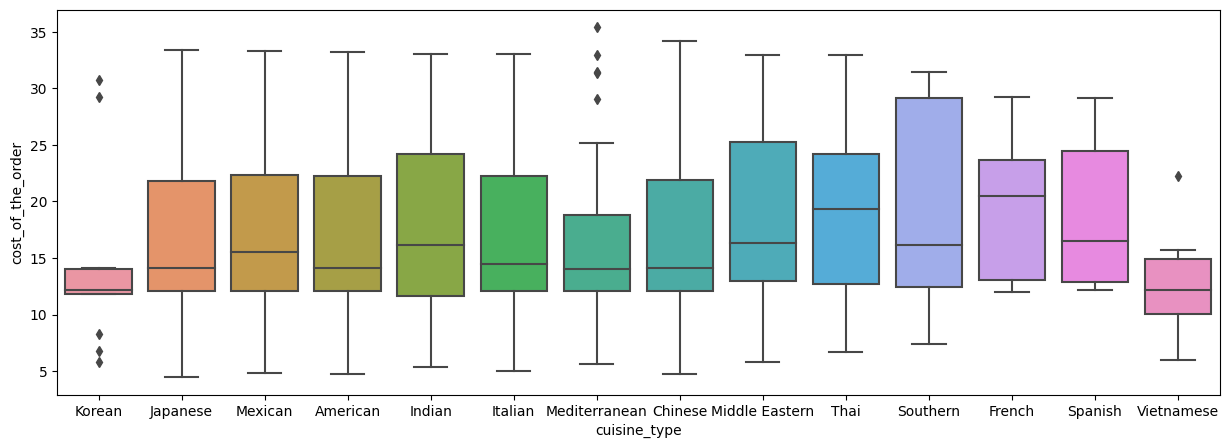

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df,x='cuisine_type',y='cost_of_the_order')

**Observations:**
<br>
The median cost of the orders is around 15 and 20, with minimun costs of 5 dollars for most of the cuisine types and maximum values up to 34 dollars. Only 3 cuisine types have outliers, only 2 have higher values outliers and the last (korean)  have lower outliers with 2 extreme high outliers.

### Day of the week and Delivery time

<Axes: xlabel='day_of_the_week', ylabel='delivery_time'>

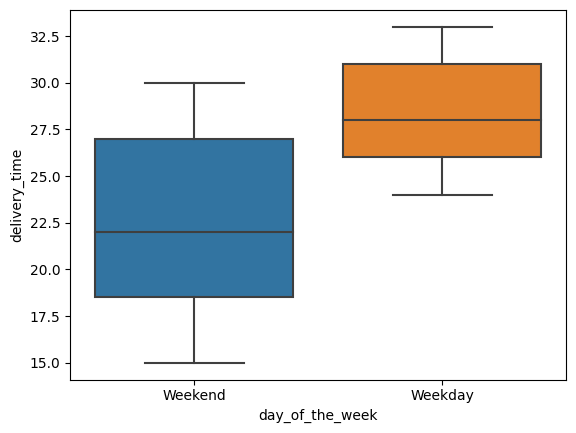

In [ ]:
sns.boxplot(data=df,x='day_of_the_week',y='delivery_time')

**Observations:**

The delivery time average is much lower on weekends than on weekdays.

### Correlation plot between numerical variables

<Axes: >

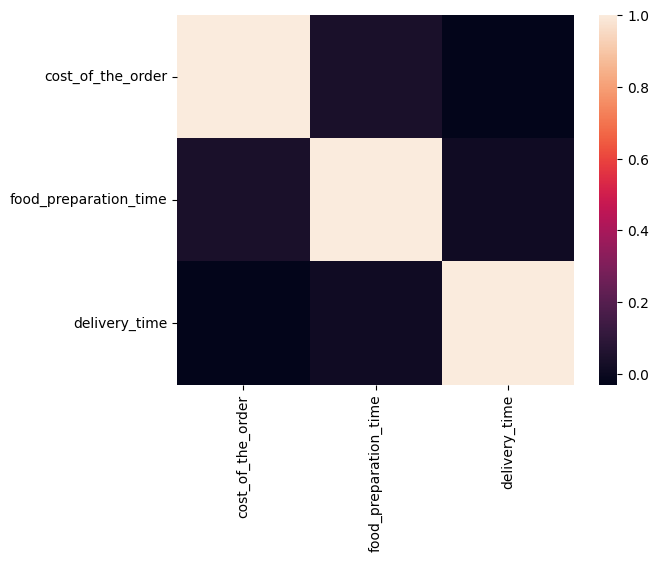

In [ ]:
sns.heatmap(df[['cost_of_the_order','food_preparation_time','delivery_time']].corr())

**Observations:**
<br>
The variables shown in the heatmap above show low and week correlation between them, besides the correlation between same varibles.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [ ]:
df1 = df.copy() #Make a copy of original dataframe

In [ ]:
df1 = df1.loc[~(df1['rating'] == 'Not given')] #drop rows where condition is True and assign new data to new df using boolean indexing (~)

In [ ]:
ratingg = df1.groupby('restaurant_name')['rating'].count().sort_values(ascending=False).reset_index() #Select variable values from the columns mentioned, show theirs values, order in non ascending order and reset index as it keep the index before dropping rows
ratingg.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [ ]:
q13 = ratingg[:4]['restaurant_name'] #Select only values that meet the condition of ratin count more than 50
q13

0                  Shake Shack
1            The Meatball Shop
2            Blue Ribbon Sushi
3    Blue Ribbon Fried Chicken
Name: restaurant_name, dtype: object

In [ ]:
restaurants = df1[df1['restaurant_name'].isin(q13)].copy() #On main df, get only values that meet the condition and make a new df with only the new values
topRes = restaurants.groupby('restaurant_name')['rating'].mean() #get the mean rating value
topRes

restaurant_name
Blue Ribbon Fried Chicken     5.552274e+61
Blue Ribbon Sushi             6.089773e+70
Shake Shack                  4.177018e+130
The Meatball Shop             6.494697e+81
Name: rating, dtype: float64

#### **Observations:**

There are 4 values that meet both conditions, have a rating count of more than 50 and their average rating ir greater than 4.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [ ]:
costOrder = df['cost_of_the_order'] #assign variable with cost of the order values
sum = 0 # create num variable to add values
count = 0
for i in costOrder: # for loop to iterate in cost of the order column
  if i > 20: # values in costOrder greater than 20 condition
    sum += i #if condition meet, add 1 to sum variable
    count += 1

print("Number of orders greater than 20 dollars:",count)

total = round(sum,2)
print("The net revenue generated by orders over 20 dollars is: $", total)

sum2 = 0 #create num variable for condition 2
count2 = 0
for x in costOrder: #iterate on same column
  if x > 5 and x<= 20: #expected condition
    sum2 += x #if condition meet, add 1 to num variable
    count2 += 1

print("Number of orders greater than 5 dollars:",count2)

total2 = round(sum2,2)
print("The net revenue generated by orders greater than 5 dollars is: $", total2)

totalRevenue = round(total + total2,2)
print("The company revenue has a total of: $",totalRevenue)

Number of orders greater than 20 dollars: 555
The net revenue generated by orders over 20 dollars is: $ 14754.91
Number of orders greater than 5 dollars: 1334
The net revenue generated by orders greater than 5 dollars is: $ 16517.17
The company revenue has a total of: $ 31272.08


#### **Observations:**

For both conditions (greater than 20 dollars and greater than 5 dollares and less or equal to 20), the results shows slightly differences on the revenues, on where orders greater than 5 dollars have 12% more revenue than orders greater than 20 dollars. Result that can be explained by the cheaper prices and by the number of orders, orders greater than 5 with 1334 orders versus 555 orders for orders greater than 20 dollars.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [ ]:
df['total_time'] = df['food_preparation_time'] + df['delivery_time'] #add a new column with the sum of both times
count = 0 # create num variable
for i in df['total_time']: #iterate in new column
  if i > 60: # condition
    count += 1 #add to num variable count if condition match

totalOrders = df['total_time'].count() #assign total number of orders to variable
totalPerc = round((count/totalOrders)*100,2) #return percentage of orders greater than 60 min
print('The percentage of the total orders that take more than 60 minutes on be prepared and delivered is:',totalPerc,'%')

The percentage of the total orders that take more than 60 minutes on be prepared and delivered is: 10.54 %


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [ ]:
df.groupby(['day_of_the_week'])['delivery_time'].mean() #separate df values by day of the week and calculate mean of dataframe to see mean of delivery time by day

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

#### **Observations:**

The delivery time average has a 12% variation between weekdays and weekends.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:
* In the dataset are 14 cuisine types of that, 2 are highly more common with 2 more considerably more common than the rest. The top 4 are:
  1. American
  2. Japanease
  3. Italian
  4. Chinese  
* In the weekends customers tend to order more than weekdays.
* The top restaurants, 2 have American cuisine, 2 italian cuisine and 1 japanese cuisine.
* The top restaurants in number of orders are also the restaurants with higher ratings besides 1 restaurant.
* Not give rating predominates over giving rating.

### Recommendations:

*  Business strategys have to focus on the top 5 restaurants and the top 4 cuisine types (American,Japanease,Italian,Chinese).
* As weekends have more orders, strategys to increase revenue (discounts perhaps) could apply to weekends, focusing on order quantity (volume) in orders between 15 and 20 dollars that are almost 2.5X higher than orders over 20 dollars.
* Finding a way to get customers to give a rating would significantly increase the value of the data leading to new insights and recommendations.